In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [11]:
# Load the data
df_train = pd.read_csv('df_train_small.csv')
df_test = pd.read_csv('df_test_small.csv')

In [5]:
print(df_train['activityID'].unique())
print(df_test['activityID'].unique())


['Nordic walking' 'ascending stairs' 'cycling' 'descending stairs'
 'ironing' 'lying' 'rope jumping' 'running' 'sitting' 'standing'
 'transient activities' 'vacuum cleaning' 'walking']
['Nordic walking' 'ascending stairs' 'cycling' 'descending stairs'
 'ironing' 'lying' 'rope jumping' 'running' 'sitting' 'standing'
 'transient activities' 'vacuum cleaning' 'walking']


In [48]:
print(df_train['activityID'].unique())

[11  0  1  8  9 10 12  2  3  4  5  6  7]


In [14]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Standardize the activityID column
df_train['activityID'] = df_train['activityID'].astype(str)
df_train['activityID'] = df_train['activityID'].str.strip().str.lower()
df_test['activityID'] = df_test['activityID'].astype(str)
df_test['activityID'] = df_test['activityID'].str.strip().str.lower()

# Encode activityID
label_encoder = LabelEncoder()
df_train['activityID'] = label_encoder.fit_transform(df_train['activityID'])
df_test['activityID'] = label_encoder.transform(df_test['activityID'])

# Split features and target
X_train = df_train.drop(columns=['activityID', 'PeopleId'])
y_train = df_train['activityID']

X_test = df_test.drop(columns=['activityID', 'PeopleId'])
y_test = df_test['activityID']

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for multi-class classification
num_classes = len(label_encoder.classes_)
params = {
    'objective': 'multi:softmax',
    'num_class': num_classes,
    'eval_metric': 'mlogloss',
    'max_depth': 6,
    'eta': 0.3,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train the model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Make predictions
preds = model.predict(dtest)

# Evaluate in sample accuracy
accuracy = accuracy_score(y_train, model.predict(dtrain))
print(f"In sample accuracy: {accuracy:.2f}")

# Evaluate out of sample accuracy
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.2f}")


In sample accuracy: 1.00
Accuracy: 0.64


In [59]:
activity_mapping = {
    '0': 'ascending stairs',
    '1': 'cycling',
    '2': 'running',
    '3': 'sitting',
    '4': 'standing',
    '5': 'transient activities',
    '6': 'vacuum cleaning',
    '7': 'walking',
    '8': 'descending stairs',
    '9': 'ironing',
    '10': 'lying',
    '11': 'Nordic walking',
    '12': 'rope jumping'
}

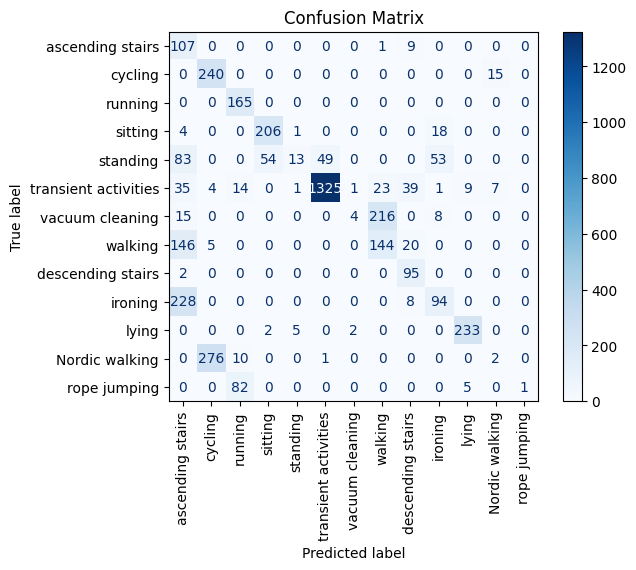

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert numeric predictions and test labels back to activity names
y_test_decoded = [activity_mapping[str(int(y))] for y in y_test]
preds_decoded = [activity_mapping[str(int(p))] for p in preds]

# Generate the confusion matrix
cm = confusion_matrix(y_test_decoded, preds_decoded, labels=list(activity_mapping.values()))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(activity_mapping.values()))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

